<a href="https://colab.research.google.com/github/gmvula/DSA-Chatbot/blob/main/Gebhard_Mvula_Recommending_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Your movie recommnder***

In [68]:
# Key python packages were imported, namely pandas, numpy and warnings
import pandas as pd 

In [69]:
import numpy as np

In [70]:
import warnings
warnings.filterwarnings('ignore')

## Loading and defining the data sets

In [71]:
#Loading the ratings file
my_df = pd.read_csv(r"/content/u.data", sep='\t', names=['user_id','item_id','rating','timestamp'])

In [72]:
#Reading the names of the collums of the data set
my_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [73]:
#Importing movie titles and joining with main data with the pandas dataframe function
movie_titles = pd.read_csv('/content/Movie_Titles.csv',encoding= 'unicode_escape')
my_df = pd.merge(my_df, movie_titles, on='item_id')
my_df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


Investigating the data

In [74]:
#Statitical features of the movie
my_df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [75]:
#creating mean ratings data
ratings = pd.DataFrame(my_df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [76]:
#creating number of ratings data
ratings['number_of_ratings'] = my_df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


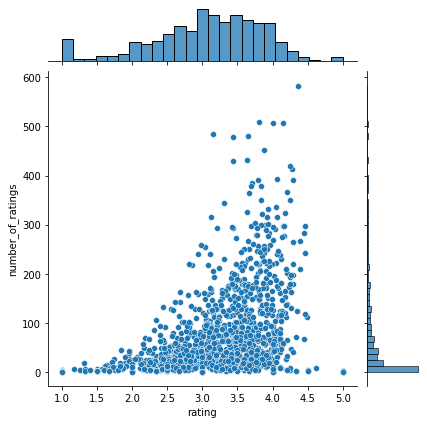

In [66]:
#Creating a jointplot - The more ratings the higher the better the ratings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)


How each user rated each movie

In [77]:
#How each user rated each movie
movie_matrix_UII = my_df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix_UII.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0


In [78]:
# This is the highly rated movies
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [79]:
#Least rated movies
ratings.sort_values('number_of_ratings', ascending=True).head(100)

,rating,number_of_ratings
title,,
Lady of Burlesque (1943),4.0,1
"Other Voices, Other Rooms (1997)",3.0,1
Office Killer (1997),1.0,1
"Object of My Affection, The (1998)",4.0,1
"Brother's Kiss, A (1997)",2.0,1
...,...,...
"Death in the Garden (Mort en ce jardin, La) (1956)",1.0,1
Johns (1996),3.0,1
Desert Winds (1995),4.0,1


# Recommendation for (Scream)

In [ ]:
#Fetching ratings for Scream
Scream_user_rating = movie_matrix_UII['Scream (1996)']

In [ ]:
#Finding the correlation with different movies
similar_to_Scream=movie_matrix_UII.corrwith(Scream_user_rating)

In [80]:
#Observing the result (Top 10)
similar_to_Scream.head(10)

title
'Til There Was You (1997)                      0.454859
1-900 (1994)                                  -0.944911
101 Dalmatians (1996)                          0.124059
12 Angry Men (1957)                           -0.025659
187 (1997)                                     0.382836
2 Days in the Valley (1996)                    0.014552
20,000 Leagues Under the Sea (1954)            0.261985
2001: A Space Odyssey (1968)                   0.064604
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.127630
dtype: float64

# creating a threshold for minimum number of ratings

In [83]:
#discovering #of ratings for the Scream in relation to others.
corr_Scream = pd.DataFrame(similar_to_Scream, columns=['Correlation'])
corr_Scream.dropna(inplace=True)
corr_Scream.head()

,Correlation
title,
'Til There Was You (1997),0.454859
1-900 (1994),-0.944911
101 Dalmatians (1996),0.124059
12 Angry Men (1957),-0.025659
187 (1997),0.382836


In [84]:
#Bringining in ratings
corr_Scream = corr_Scream.join(ratings['number_of_ratings'])
corr_Scream.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.454859,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.124059,109
12 Angry Men (1957),-0.025659,125
187 (1997),0.382836,41


In [85]:
corr_Scream[corr_Scream['number_of_ratings'] > 30].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
I Know What You Did Last Summer (1997),0.586728,100
Sabrina (1954),0.577481,64
"Young Poisoner's Handbook, The (1995)",0.554289,41
"Replacement Killers, The (1998)",0.523828,39
Young Guns II (1990),0.521852,44
Cape Fear (1962),0.517568,86
Kalifornia (1993),0.515320,59
